In [70]:
import tensorflow_datasets as tfdb



In [71]:

imdb_plaintext, info_plaintext = tfdb.load("imdb_reviews", with_info=True, as_supervised=True)


imdb_subwords, info_subwords = tfdb.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [72]:
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [73]:
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [74]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [75]:
for example in imdb_subwords['train'].take(2):
  print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [76]:
tokenizer_subwords = info_subwords.features['text'].encoder

In [77]:
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [78]:
train_data = imdb_plaintext['train']

In [79]:
training_sentences = []

In [80]:
for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'


In [82]:
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token=oov_tok)
tokenizer_plaintext.fit_on_texts(training_sentences)
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

In [83]:
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [84]:
len(tokenizer_plaintext.word_index)

88583

In [85]:
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)


[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]


In [86]:
original_string = tokenizer_subwords.decode(tokenized_string)

In [87]:
print (original_string)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [88]:
sample_string = 'TensorFlow, from basics to mastery'
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print ('Tokenized string is {}'.format(tokenized_string))
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [89]:
tokenized_string = tokenizer_subwords.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [90]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data, test_data = imdb_subwords['train'], imdb_subwords['test'], 
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [91]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [92]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 56s 136ms/step - loss: 0.6752 - accuracy: 0.6056 - val_loss: 0.6295 - val_accuracy: 0.6939
Epoch 2/10
391/391 [==============================] - 49s 126ms/step - loss: 0.5221 - accuracy: 0.8066 - val_loss: 0.4624 - val_accuracy: 0.8046
Epoch 3/10
391/391 [==============================] - 47s 119ms/step - loss: 0.3764 - accuracy: 0.8686 - val_loss: 0.3726 - val_accuracy: 0.8548
Epoch 4/10
391/391 [==============================] - 53s 136ms/step - loss: 0.3050 - accuracy: 0.8944 - val_loss: 0.3315 - val_accuracy: 0.8741
Epoch 5/10
391/391 [==============================] - 51s 130ms/step - loss: 0.2651 - accuracy: 0.9079 - val_loss: 0.3147 - val_accuracy: 0.8787
Epoch 6/10
391/391 [==============================] - 50s 127ms/step - loss: 0.2396 - accuracy: 0.9159 - val_loss: 0.3156 - val_accuracy: 0.8720
Epoch 7/10
391/391 [==============================] - 51s 130ms/step - loss: 0.2171 - accuracy: 0.9236 - val_loss: 0.3215 - val_ac

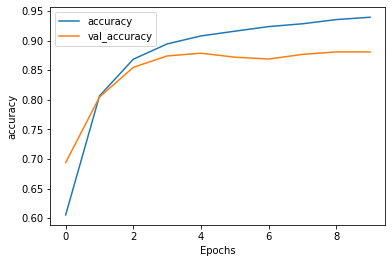

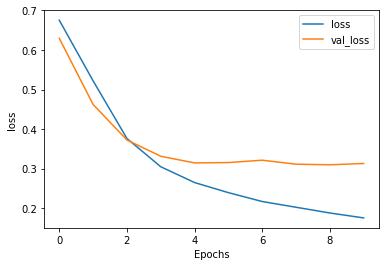

In [97]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [98]:
embedding_layer = model.layers[0]

embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape)

(8185, 64)


In [99]:
reverse_word_index = tokenizer_plaintext.index_word

In [100]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):


  if(word_num<8085):

    word_name = reverse_word_index[word_num]

    word_embedding = embedding_weights[word_num]

    out_m.write(word_name + "\n")

    out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")
  
  else:
    break

out_v.close()
out_m.close()

# import os
# files = "P:\Data Science\Machine Learning\IMDB-Review" files.download('vecs.tsv') files.download('meta.tsv')
